In [2]:
import glob
import matplotlib.pyplot as plt
import cv2

In [3]:
import sys
sys.path.append("../debug")
from undistort import calibrator

In [4]:
calib = calibrator("../calibration_data.pkl")

In [5]:
images_address = glob.glob("../calibration images/*.jpg")
images = [plt.imread(x) for x in images_address]

In [6]:
images[0].shape[:2]

(720, 1280)

In [14]:
import pickle as pkl
import cv2
import numpy as np

class calibrator:
    
    def __init__(self, calibration_data:str):
        with open(calibration_data,'rb') as f:
            self.ret, self.mtx, self.dist, self.rvecs, self.tvecs, self.w, self.h= pkl.load(f)
            self.newcameramtx, self.roi = cv2.getOptimalNewCameraMatrix(self.mtx, self.dist, (self.w,self.h), 1, (self.w,self.h))

    def undistort(self, img:np.ndarray)->np.ndarray:
        dst = cv2.undistort(img, self.mtx, self.dist, None, self.newcameramtx)
        x, y, w, h = self.roi
        return dst[y:y+h, x:x+w]


In [16]:
calib  = calibrator("../calibration_data.pkl")

In [151]:
points_1 = [(306, 551), (392,554), (477, 574)] # WIN_20240108_15_22_55_Pro.jpg
points_2 = [(466, 527),(555 ,526),(642, 543)] # WIN_20240108_15_22_59_Pro.jpg

In [190]:
points_1_calibrated = [(302, 492), (381, 493), (457, 509)] # WIN_20240108_15_22_55_Pro.jpg
points_2_calibrated = [(448, 468), (527, 467), (604, 481)] # WIN_20240108_15_22_59_Pro.jpg

In [7]:
points_1 = [(307, 426),(362 ,428),(415, 431), (472, 433), (528, 436), (583, 438), (640, 441), (697, 443)] # WIN_20240108_17_20_43_Pro.jpg
points_2 = [(427, 429),(484 ,431),(540, 434), (598, 436), (654, 438), (710, 439), (767, 442), (822, 443)] # WIN_20240108_17_20_51_Pro.jpg

In [96]:
points_1_calibrated = [(305, 379),(355 ,380),(403, 383), (454, 384), (502, 387), (552, 389), (602, 391), (652, 393)] # WIN_20240108_17_20_43_Pro.jpg
points_2_calibrated = [(413, 381),(464 ,382),(513, 384), (564, 386), (613, 389), (663, 389), (713, 391), (762, 393)] # WIN_20240108_17_20_51_Pro.jpg

(644, 1215, 3)
../calibration images\WIN_20240108_17_20_51_Pro.jpg


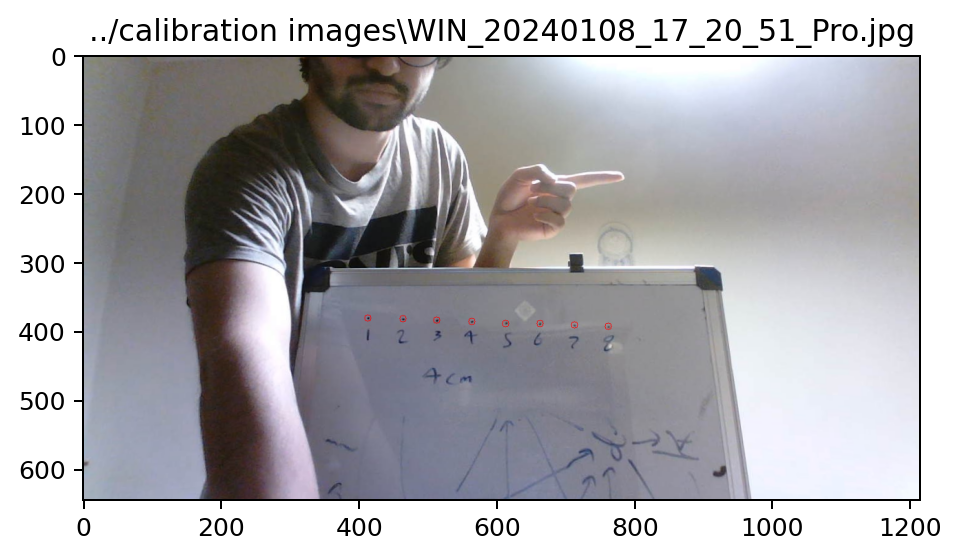

In [95]:
points = [(413, 381),(464 ,382),(513, 384), (564, 386), (613, 389), (663, 389), (713, 391), (762, 393)] # WIN_20240108_17_20_51_Pro.jpg
index = 1
test_img = calib.undistort(images[index])
print(test_img.shape)
print(images_address[index])
for point in points:
    cv2.circle(test_img, point, 5, (255, 0, 0), 1)
plt.figure(dpi=180)
plt.title(images_address[index])
plt.imshow(test_img)

In [9]:
class stereo:
    '''
    A class for extracting the 3d location of objects using their 2d locations in images.
    '''
    def __init__(self, b:int):
        '''
        Args:
            b (int): the distance between the center of the cameras in any unit
        '''
        self.b = b
        self.f = 2
    
    def locate(self, p1:tuple, p2:tuple):
        x_disparity = abs(p1[0] - p2[0])
        y_average = (p1[1] + p2[1]) / 2
        const = 5.63
        x = p1[0] * self.b / x_disparity / const
        y = y_average * self.b / x_disparity / const
        z = (self.f * self.b) / x_disparity / const
        return [x, y, z]

In [10]:
def distance(p1, p2):
    dis = 0
    for i in range(len(p1)):
        dis += (p1[i] - p2[i])**2

    return dis**0.5

# Distance for Uncalibrated images

In [11]:
st = stereo(8.5)
pose3 = []
for i in range(len(points_1)):
    pose3.append(st.locate(points_1[i], points_2[i]))

In [22]:
pose3 # locations of points in 3d space

[[3.8624925991711074, 5.378552397868561, 0.02516281823564239],
 [4.479806656378302, 5.315129720758233, 0.024750313018664646],
 [5.012433392539965, 5.2238010657193605, 0.0241563055062167],
 [5.655642955820576, 5.206306915898391, 0.023964588795849895],
 [6.326651442104374, 5.2362626518932025, 0.023964588795849895],
 [6.930672298289535, 5.2128641557460735, 0.023775891246276278],
 [7.608285198808408, 5.248527992615488, 0.023775891246276278],
 [8.41847246891652, 5.350621669626998, 0.0241563055062167]]

In [24]:
for i in range(len(points_1) - 1): # distance between points
    print(distance(pose3[i], pose3[i+1]))

0.6205636561691333
0.5404003295246588
0.6434474526555297
0.6716768082819775
0.6044739199794873
0.6785507734944004
0.8165945605047666


# Distance for Calibrated images

In [97]:
st = stereo(8.5)
pose3_calibrated = []
for i in range(len(points_1)):
    pose3_calibrated.append(st.locate(points_1_calibrated[i], points_2_calibrated[i]))

In [98]:
pose3_calibrated # locations of points in 3d space for calibrated images

[[4.263699756594961, 5.312150516413394, 0.027958686928491547],
 [4.9171378754053485, 5.277266283181515, 0.02770218521355126],
 [5.5312449539803, 5.263604069110285, 0.027450347166155336],
 [6.231228806717261, 5.284191829484903, 0.027450347166155336],
 [6.827964732049989, 5.277391067799593, 0.027203046741235016],
 [7.508040900580866, 5.290992591170212, 0.027203046741235016],
 [8.18811706911174, 5.318195637911446, 0.027203046741235016],
 [8.94881317616664, 5.393993218149523, 0.027450347166155336]]

In [99]:
for i in range(len(points_1) - 1): # distance between points for calibrated images
    print(distance(pose3_calibrated[i], pose3_calibrated[i+1]))

0.6543686656891238
0.6142590849727759
0.7002865484712109
0.5967747281007367
0.6802121701657794
0.6806200120152506
0.7644631460155074
